**Bank Statements** (P1- BankStatements.json) – 50 Marks

**1.  Transaction Analysis:**
   - What is the total number of transactions made over the year?
   - What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)
   - Analyze the frequency of different transaction types (debit vs. credit).

**2.  Balance Analysis:**
   - What is the trend of the account balance over time?
   - Identify any periods with significant changes in the account balance.

**3.  Spending Patterns:**
   - What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?
   - Analyze the frequency and amount of spending in each category.

**4.  Income Analysis:**
   - What are the main sources of income (e.g., salary, UPI credits)?
   - Identify any patterns in the timing and amount of income received.

**5.  Alert Generation:**
   - Identify any unusual or suspicious transactions.
   - Generate alerts for low balance or high expenditure periods.


**Given the BankStatements of a person's data. We need to perform the above mentioned tasks.**

importing necessary libraries

In [1]:
import pandas as pd
import json

loading json file and store it in the variable data

In [2]:
with open('/content/P1- BankStatements.json', 'r') as file:
    data = json.load(file)

# **1.TRANSACTION ANALYSIS**

In [3]:
df =pd.DataFrame(data)

In [4]:
df

,Account
Profile,"{'Holders': {'type': 'SINGLE', 'Holder': {'nam..."
Summary,"{'currentBalance': '761.41', 'currency': 'INR'..."
Transactions,"{'startDate': '2023-05-31', 'endDate': '2024-0..."
linkedAccRef,02f28b8d-d8a3-43d7-88c6-5fabb2e51541
maskedAccNumber,XXXX6461
type,deposit
version,1.1
xmlns,http://api.rebit.org.in/FISchema/deposit
xmlns:xsi,http://www.w3.org/2001/XMLSchema-instance
xsi:schemaLocation,http://api.rebit.org.in/FISchema/deposit.xsd


As we need to do transaction analysis hence we need to take the transaction array which consists of transactions of the person.Hence,below line of code takes the transactions array and store it in the transactions variable.

In [5]:
transactions = data['Account']['Transactions']['Transaction']

In [6]:
transactions = pd.DataFrame(transactions)

In [7]:
transactions.head(5)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


**A) TOTAL NUMBER OF TRANSACTIONS MADE OVER THE YEAR**

In [8]:
total_transac = len(transactions)
total_transac

985

In [9]:
print("Total transactions made over the year are",total_transac)

Total transactions made over the year are 985


**B)DISTRIBUTION OF TRANSACTION AMOUNTS (e.g., small vs. large transactions)**

**Defining threshold value for to categorize between small and large transactions**

In [10]:
transactions.describe()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
count,985,985,985,985,985,985,985,985,985
unique,2,5,206,938,985,276,985,982,3
top,DEBIT,UPI,10.0,1525.80,2023-06-27T09:40:19+05:30,2023-08-25,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
freq,695,789,69,3,1,12,1,4,826


In [11]:
print("smallest_amount is ",min(transactions['amount']))

smallest_amount is  1.0


In [12]:
print("largest_amount is ",max(transactions['amount']))

largest_amount is  950.0


***Inorder to calculate the average we must ensure that all the values of the column must be numeric type hence to achieve this we will use pd.to_numeric function***

In [13]:
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce')

In [14]:
transactions['amount'].fillna(0, inplace=True)

In [15]:
transactions['amount'].head(10)

0     100.0
1     170.0
2     500.0
3      15.0
4    1000.0
5       1.0
6    3000.0
7     300.0
8    1200.0
9     400.0
Name: amount, dtype: float64

In [16]:
average_amount = transactions['amount'].describe()
average_amount

count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64

In [17]:
print("average_amount is",average_amount)

average_amount is count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64


Defining some **threshold value** inorder to **categorize** the transactions as **small and large**.Hence,we choose the **threshold value as 300** in this case.

In [18]:
threshold = 300

We will be **using list comprehension** inorder to store the **small and large** transactions in  two different lists

In [19]:
small_transac=[int(x) for x in transactions['amount'] if x < threshold]

In [20]:
large_transac=[int(x) for x in transactions['amount'] if x >= threshold]

In [21]:
print("length of small transactions are",len(small_transac))

length of small transactions are 618


In [22]:
print("length of large transactions are",len(large_transac))

length of large transactions are 367


**C) Analyzing the frequency of different transaction types (debit vs. credit) by using value_counts().**


In [23]:
transac_type = transactions['type'].value_counts()

In [24]:
number_of_debit_transactions = transactions[transactions['type']=='DEBIT'].shape[0]

In [25]:
print(f'The number of DEBIT transactions are {number_of_debit_transactions} ')

The number of DEBIT transactions are 695 


In [26]:
number_of_credit_transactions = transactions[transactions['type']=='CREDIT'].shape[0]

In [27]:
print(f'The number of CREDIT transactions are {number_of_credit_transactions} ')

The number of CREDIT transactions are 290 


In [28]:
print(transac_type)

type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


## **2.  BALANCE ANALYSIS**

**A) Trend of the account balance over time**

In [29]:
import matplotlib.pyplot as plt

In [30]:
transactions.columns

Index(['type', 'mode', 'amount', 'currentBalance', 'transactionTimestamp',
       'valueDate', 'txnId', 'narration', 'reference'],
      dtype='object')

In [31]:
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])

In [32]:
transactions['transactionTimestamp'].head()

0   2023-06-27 09:40:19+05:30
1   2023-06-28 09:51:57+05:30
2   2023-07-26 10:04:00+05:30
3   2023-08-06 11:10:38+05:30
4   2023-08-07 17:13:13+05:30
Name: transactionTimestamp, dtype: datetime64[ns, UTC+05:30]

In [33]:
transactions.sort_values('transactionTimestamp', inplace=True)

In [34]:
transactions['transactionTimestamp'].head()

0   2023-06-27 09:40:19+05:30
1   2023-06-28 09:51:57+05:30
2   2023-07-26 10:04:00+05:30
3   2023-08-06 11:10:38+05:30
4   2023-08-07 17:13:13+05:30
Name: transactionTimestamp, dtype: datetime64[ns, UTC+05:30]

In [35]:
transactions['currentBalance'] = pd.to_numeric(transactions['currentBalance'])

In [36]:
transactions['balanceChange'] = transactions['currentBalance'].diff()

In [37]:
transactions['balanceChange'].fillna(0, inplace=True)

In [38]:
transactions['balanceChange'].head()

0       0.0
1    -170.0
2    -500.0
3      15.0
4   -1000.0
Name: balanceChange, dtype: float64

In [39]:
print(max(transactions['balanceChange']))

45000.0


**Graph Visualising the trend of the account balance over time**.

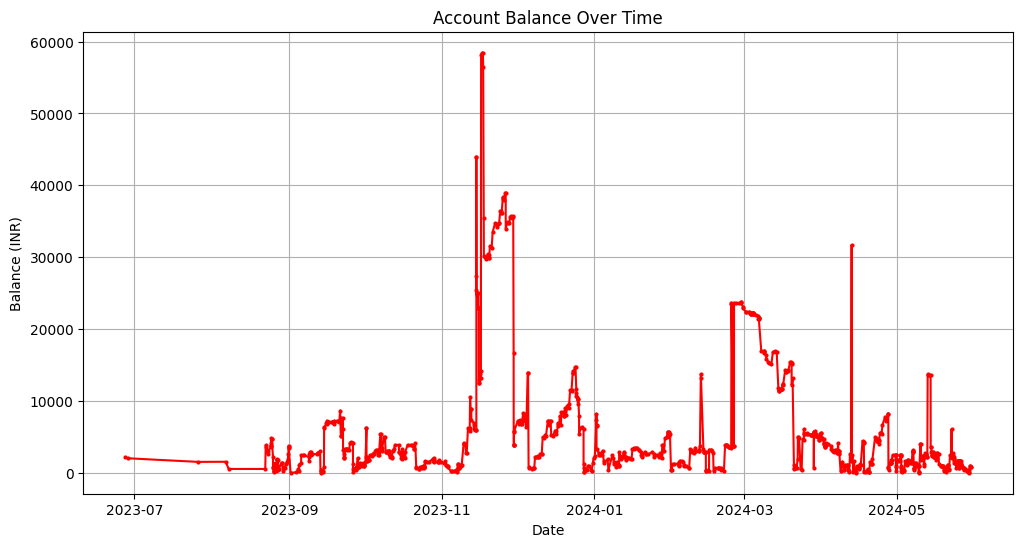

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(transactions['transactionTimestamp'], transactions['currentBalance'], marker='o', linestyle='-', color='r',ms=2)
plt.title('Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance (INR)')
plt.grid(True)
plt.show()

**B) Identify any periods with significant changes in the account balance .**

To do that we need to first Define a threshold for significant change

In [41]:
threshold = 1000

**Print periods with significant changes**

In [42]:
significant_changes = transactions[transactions['balanceChange'].abs() > threshold]
# print("Transactions with significant changes in balance:")
# print(significant_changes)
print("Periods with significant changes in balance:")
print(significant_changes[['transactionTimestamp', 'currentBalance', 'balanceChange']])

Periods with significant changes in balance:
         transactionTimestamp  currentBalance  balanceChange
6   2023-08-22 11:49:13+05:30         3524.80         3000.0
8   2023-08-23 08:17:48+05:30         2624.80        -1200.0
17  2023-08-25 10:24:38+05:30         2244.80        -2480.0
18  2023-08-25 10:39:35+05:30          794.80        -1450.0
36  2023-08-27 12:19:54+05:30          315.80        -1499.0
..                        ...             ...            ...
911 2024-05-17 18:51:36+05:30         1259.31        -1300.0
925 2024-05-21 05:47:33+05:30         1119.31         1070.0
930 2024-05-22 04:42:07+05:30         2454.31         2050.0
935 2024-05-22 20:21:48+05:30         6085.31         3920.0
936 2024-05-22 20:25:35+05:30         2165.31        -3920.0

[150 rows x 3 columns]


# **3.  SPENDING PATTERNS**

**A) main categories of expenses**

In [43]:
transactions['narration'].head(10)

0             PRCR/MS NEHA FILLING STATIO/FARRUKHAB
1             PRCR/MS NEHA FILLING STATIO/FARRUKHAB
2             PRCR/MS NEHA FILLING STATIO/FARRUKHAB
3       51888100006461IntPd01-05-2023 to 31-07-2023
4            ATM/CASH/321917012791/XXXXXXXXXXXX8896
5    UPI/323444770475/080506/UPI/8795417446ybl/Paym
6    UPI/323441197152/114914/UPI/8795417446ybl/Paym
7    UPI/323457106254/122004/UPI/9264998949barodamp
8    UPI/323568910825/081748/UPI/8795417446ybl/Paym
9     UPI/323567840697/105122/UPI/kimoroybl/Payment
Name: narration, dtype: object

**Function** to categorize the transactions by using conditional statements (if-elif-else)

In [44]:
def categorize_expense(narration, mode):
    if "FILLING STATIO" in narration:
        return "Fuel"
    elif "ecommerce" in narration or mode == "CARD":
        return "Ecommerce"
    elif "food" in narration:
        return "Food"
    elif "shopping" in narration:
        return "Shopping"
    elif "ATM" in narration or mode == "ATM":
        return "ATM Withdrawal"
    elif "UPI" in narration or mode == "UPI":
        return "UPI Transaction"
    else:
        return "Other"

The below code here uses the **apply method** in pandas to **create a new column category** by applying a function called **categorize_expense** to each row of the DataFrame transactions. The apply method with **axis=1 means** that the function will be applied to **each row individually**.

In [45]:
transactions['category'] = transactions.apply(lambda x: categorize_expense(x['narration'], x['mode']), axis=1)

In [46]:
transactions['category'].value_counts()

category
UPI Transaction    789
Other              189
Fuel                 4
ATM Withdrawal       3
Name: count, dtype: int64

**B) Analyzing the frequency and amount of spending in each category**

The code here provided groups the transactions DataFrame by the category column and then aggregates the amount column to count the number of transactions and sum the total amount for each category. The resulting summary is then reset to a DataFrame with a default integer index.

In [47]:
category_summary = transactions.groupby(['category']).agg({
    'amount': ['count', 'sum']
}).reset_index()

In [48]:
category_summary

category amount           
                    count        sum
0   ATM Withdrawal      3   13500.00
1             Fuel      4     830.00
2            Other    189  241237.51
3  UPI Transaction    789  587092.90

In [49]:
category_summary.columns = ['Category', 'Transaction_Count', 'Total_Amount']
category_summary = category_summary.sort_values(by='Total_Amount', ascending=False)

In [50]:
category_summary

,Category,Transaction_Count,Total_Amount
3,UPI Transaction,789,587092.90
2,Other,189,241237.51
0,ATM Withdrawal,3,13500.00
1,Fuel,4,830.00


**Graph Visualising the Total Amount Spent by Category**

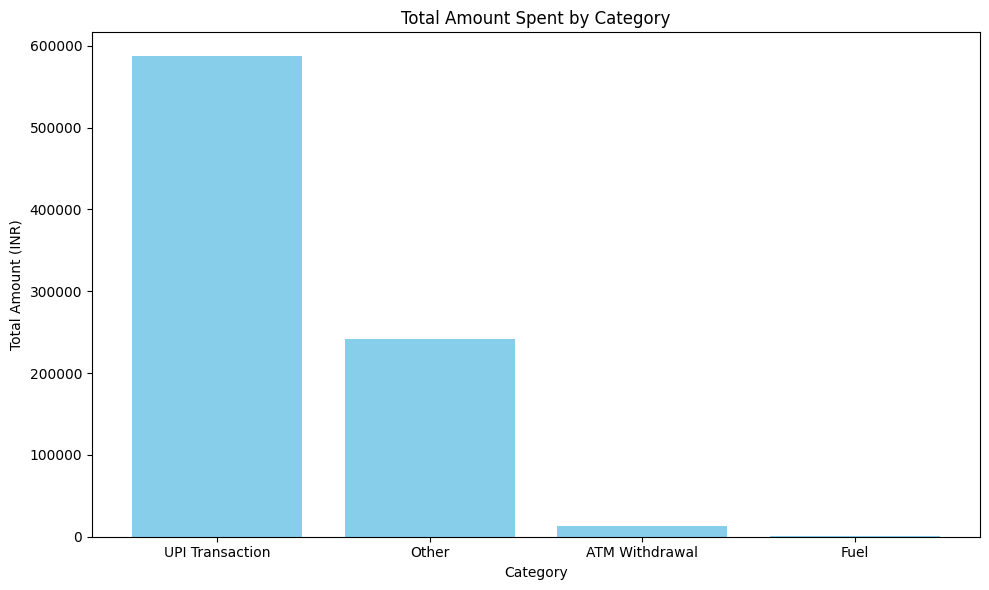

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(category_summary['Category'], category_summary['Total_Amount'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.title('Total Amount Spent by Category')
plt.tight_layout()
plt.show()

## **4.INCOME ANALYSIS**

**A) main sources of income**

In [52]:
transactions['narration'].head(-10)

0                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
1                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
2                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
3            51888100006461IntPd01-05-2023 to 31-07-2023
4                 ATM/CASH/321917012791/XXXXXXXXXXXX8896
                             ...                        
970       UPI/414852275431/182559/UPI/gpay-11223375885ok
971       UPI/451446471636/195322/UPI/Q935592796ybl/Paym
972    NEFT-AXNPN14927376982-PHONEPE PRIVATE LIMITED-...
973       UPI/414983060461/120913/UPI/gpay-11223375885ok
974       UPI/414942119710/204537/UPI/gpay-11223375885ok
Name: narration, Length: 975, dtype: object

In [53]:
def categorize_income1(narration, mode):
    if "Salary" in narration or "UPI" in mode:
        return "Salary/UPI Credit"
    elif "Dividend" in narration:
        return "Dividend"
    elif "Deposit" in narration or mode == "ATM":
        return "Other Deposits"
    else:
        return "Other Income"

In [54]:
transactions['income_category'] = transactions.apply(lambda x: categorize_income1(x['narration'], x['mode']), axis=1)

In [55]:
transactions['income_category']

0           Other Income
1           Other Income
2           Other Income
3           Other Income
4         Other Deposits
             ...        
980    Salary/UPI Credit
981         Other Income
982    Salary/UPI Credit
983    Salary/UPI Credit
984    Salary/UPI Credit
Name: income_category, Length: 985, dtype: object

In [56]:
credit_transactions = transactions[transactions['type'] == 'CREDIT']

In [57]:
credit_transactions

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,balanceChange,category,income_category
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,15.0,Other,Other Income
6,CREDIT,UPI,3000.0,3524.80,2023-08-22 11:49:13+05:30,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA,3000.0,UPI Transaction,Salary/UPI Credit
7,CREDIT,UPI,300.0,3824.80,2023-08-22 12:20:04+05:30,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA,300.0,UPI Transaction,Salary/UPI Credit
9,CREDIT,UPI,400.0,3024.80,2023-08-23 10:51:21+05:30,2023-08-23,S25232032,UPI/323567840697/105122/UPI/kimoroybl/Payment,NA,400.0,UPI Transaction,Salary/UPI Credit
10,CREDIT,UPI,500.0,3524.80,2023-08-24 11:32:18+05:30,2023-08-24,S65206796,UPI/323602109737/113218/UPI/9701028466ibl/Paym,NA,500.0,UPI Transaction,Salary/UPI Credit
...,...,...,...,...,...,...,...,...,...,...,...,...
959,CREDIT,OTHERS,1000.0,1690.31,2024-05-25 22:54:11+05:30,2024-05-25,S85499451,IMPS/P2A/414622757146/ONE97COMMUNICAT/IMPSAXB9199,NA,1000.0,Other,Other Income
972,CREDIT,OTHERS,210.0,529.31,2024-05-28 05:41:08+05:30,2024-05-28,S84053875,NEFT-AXNPN14927376982-PHONEPE PRIVATE LIMITED-...,922020004688715,210.0,Other,Other Income
975,CREDIT,OTHERS,150.0,419.31,2024-05-29 06:03:44+05:30,2024-05-29,S38920101,NEFT-AXNPN15036609374-PHONEPE PRIVATE LIMITED-...,922020004688715,150.0,Other,Other Income
978,CREDIT,UPI,300.0,348.41,2024-05-29 17:10:42+05:30,2024-05-29,S66468359,UPI/415061496542/171043/UPI/7786043828ibl/Paym,NA,300.0,UPI Transaction,Salary/UPI Credit


In [58]:
income_summary = credit_transactions.groupby('category').agg({
    'amount': ['count', 'sum']
}).reset_index()

In [59]:
income_summary.columns = ['Income Source', 'Transaction Count', 'Total Amount']
income_summary

,Income Source,Transaction Count,Total Amount
0,Other,189,241237.51
1,UPI Transaction,101,179333.00


**B) Identifying any patterns in the timing and amount of income received.**

In [60]:
transactions['transactionTimestamp'] = pd.to_datetime(transactions['transactionTimestamp'])

In [61]:
monthly_income = credit_transactions.groupby(credit_transactions['transactionTimestamp'].dt.to_period('M')).agg({
    'amount': ['count', 'sum', 'mean']
}).reset_index()

<ipython-input-61-1659f64c9e60>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_income = credit_transactions.groupby(credit_transactions['transactionTimestamp'].dt.to_period('M')).agg({


In [62]:
monthly_income.columns = ['Month', 'Transaction Count', 'Total Amount', 'Average Amount']

In [63]:
monthly_income.sort_values(by='Month')

,Month,Transaction Count,Total Amount,Average Amount
0,2023-08,24,12679.00,528.291667
1,2023-09,29,22605.00,779.482759
2,2023-10,31,21472.00,692.645161
3,2023-11,35,115737.00,3306.771429
4,2023-12,32,37953.51,1186.047188
5,2024-01,27,22127.00,819.518519
6,2024-02,22,63782.00,2899.181818
7,2024-03,26,25420.00,977.692308
8,2024-04,32,58660.00,1833.125000
9,2024-05,32,40135.00,1254.218750


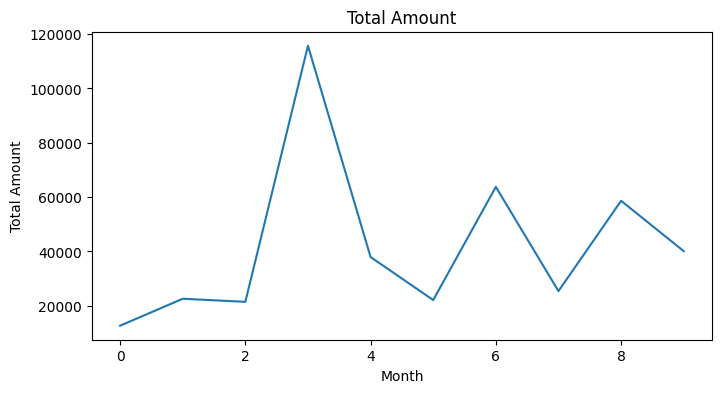

In [64]:
# @title Total Amount

from matplotlib import pyplot as plt
monthly_income['Total Amount'].plot(kind='line', figsize=(8, 4), title='Total Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

To identify patterns in the timing and amount of income received based on the provided data, we can analyze the monthly data for trends. Here are a few observations we can make:


**Monthly Trends in Total Amount:**



* November 2023 has the highest total amount of transactions with 115,737.00.
* February 2024 has the second-highest total amount of transactions with 63,782.00.
* The lowest total amount is in August 2023 with 12,679.00.

**Monthly Trends in Average Amount:**

* November 2023 has the highest average transaction amount of 3,306.77.
* February 2024 has the second-highest average
transaction amount of 2,899.18.
* August 2023 has the lowest average transaction amount of 528.29.

**Monthly Trends in Transaction Count:**

* November 2023 has the highest number of transactions with 35.
* February 2024 has the lowest number of transactions with 22.
* The transaction count is relatively stable, hovering around 26-32 transactions per month, except for the higher count in November 2023 and the lower count in February 2024.

**Comparing High and Low Months:**

* High transaction months (November 2023 and February 2024) show a pattern of higher total and average amounts.
* Low transaction months (August 2023) show a pattern of lower total and average amounts.
* Other months show more moderate levels of total and average amounts, indicating less volatility compared to the extremes.


# **5.ALERT GENERATION**

**A) Identify any unusual or suspicious transactions.**

In [65]:
transactions['amount'] = pd.to_numeric(transactions['amount'], errors='coerce')

In [66]:
mean_amount = transactions['amount'].mean()
std_amount = transactions['amount'].std()

In [67]:
print("standard_amt is",std_amount)
print("mean_amount is",mean_amount)

standard_amt is 3007.515099807174
mean_amount is 855.4928020304569


In [68]:
import numpy as np

**1. Setting the threshold :**

* A threshold value is set to 3. This **threshold is a multiplier used to determine how many standard deviations away from the mean a transaction amount** needs to be to be considered an outlier. Using 3 as a threshold is common practice in statistics to identify significant outliers.

**2. Calculating the Deviation from the Mean :**

* **transactions['amount'] - mean_amount :** This calculates the difference between each transaction amount and the mean amount.

* **np.abs() :** The np.abs() function from the NumPy library takes the absolute value of the difference. This ensures that deviations are positive, regardless of whether the transaction amount is above or below the mean.

* **threshold * std_amount :** This calculates the cutoff value for being considered an outlier. For a threshold of 3, this means any transaction amount that is more than 3 standard deviations away from the mean is considered an outlier.

* **np.abs(transactions['amount'] - mean_amount) > threshold * std_amount :** This creates a boolean Series that is True where the absolute deviation from the mean is greater than the threshold times the standard deviation, and False otherwise.



In [69]:
threshold = 3
transactions['outlier'] = np.abs(transactions['amount'] - mean_amount) > threshold * std_amount

In [70]:
transactions['outlier'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: outlier, dtype: bool

In [71]:
outliers = transactions[transactions['outlier']]

In [72]:
outliers

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,balanceChange,category,income_category,outlier
275,CREDIT,UPI,37999.0,43892.80,2023-11-14 18:31:11+05:30,2023-11-14,S65593249,UPI/331812106847/183112/UPI/311999sshuklaaxl/P,NA,37999.0,UPI Transaction,Salary/UPI Credit,True
277,DEBIT,UPI,16500.0,27391.80,2023-11-14 18:49:41+05:30,2023-11-14,S66498670,UPI/331814821452/184941/UPI/7007674186paytm/UP,NA,-16500.0,UPI Transaction,Salary/UPI Credit,True
285,DEBIT,UPI,10000.0,12970.80,2023-11-15 17:48:21+05:30,2023-11-15,S7201813,UPI/368589163186/174821/UPI/8905552611ikwik/UP,NA,-10000.0,UPI Transaction,Salary/UPI Credit,True
291,CREDIT,CASH,45000.0,58180.80,2023-11-16 15:51:14+05:30,2023-11-16,00707977,BY CASH,NA,45000.0,Other,Other Income,True
295,DEBIT,UPI,21000.0,35400.80,2023-11-17 16:34:54+05:30,2023-11-17,S82212459,UPI/332126038252/163454/UPI/msjsrfashioneazypa,NA,-21000.0,UPI Transaction,Salary/UPI Credit,True
332,DEBIT,UPI,19000.0,16625.80,2023-11-29 16:15:33+05:30,2023-11-29,S50294642,UPI/333335900423/161532/UPI/mrking25icici/UPI,NA,-19000.0,UPI Transaction,Salary/UPI Credit,True
333,DEBIT,UPI,12700.0,3925.80,2023-11-29 17:09:47+05:30,2023-11-29,S52850056,UPI/369921004440/170947/UPI/9310460780ibl/UPI,NA,-12700.0,UPI Transaction,Salary/UPI Credit,True
353,DEBIT,UPI,13000.0,865.80,2023-12-05 15:50:06+05:30,2023-12-05,S8245037,UPI/333950785257/155006/UPI/bharatpe9006616689,NA,-13000.0,UPI Transaction,Salary/UPI Credit,True
535,CREDIT,UPI,10000.0,13744.81,2024-02-12 13:22:57+05:30,2024-02-12,S97183279,UPI/440961634787/132257/UPI/8795417446ybl/Paym,NA,10000.0,UPI Transaction,Salary/UPI Credit,True
537,DEBIT,ATM,10000.0,3244.81,2024-02-13 14:01:51+05:30,2024-02-13,S47446558,ATM/CASH/404414021517/XXXXXXXXXXXX8896,NA,-10000.0,ATM Withdrawal,Other Deposits,True


In [73]:
len(outliers)

18

In [74]:
print(outliers[['transactionTimestamp', 'type', 'mode', 'amount', 'currentBalance', 'narration']])

         transactionTimestamp    type    mode   amount  currentBalance  \
275 2023-11-14 18:31:11+05:30  CREDIT     UPI  37999.0        43892.80   
277 2023-11-14 18:49:41+05:30   DEBIT     UPI  16500.0        27391.80   
285 2023-11-15 17:48:21+05:30   DEBIT     UPI  10000.0        12970.80   
291 2023-11-16 15:51:14+05:30  CREDIT    CASH  45000.0        58180.80   
295 2023-11-17 16:34:54+05:30   DEBIT     UPI  21000.0        35400.80   
332 2023-11-29 16:15:33+05:30   DEBIT     UPI  19000.0        16625.80   
333 2023-11-29 17:09:47+05:30   DEBIT     UPI  12700.0         3925.80   
353 2023-12-05 15:50:06+05:30   DEBIT     UPI  13000.0          865.80   
535 2024-02-12 13:22:57+05:30  CREDIT     UPI  10000.0        13744.81   
537 2024-02-13 14:01:51+05:30   DEBIT     ATM  10000.0         3244.81   
570 2024-02-24 18:55:15+05:30  CREDIT     UPI  20000.0        23483.91   
572 2024-02-25 11:08:34+05:30   DEBIT     UPI  20000.0         3683.91   
576 2024-02-25 20:08:58+05:30  CREDIT 

**B) Generate alerts for low balance or high expenditure periods.**

In [75]:
print(min(transactions['amount']))
print(max(transactions['amount']))
print(transactions['amount'].mean())

1.0
45000.0
855.4928020304569


In [76]:
min_balance = 100
max_expenditure = 5000

In [77]:
# Identify periods with low balance
low_balance_periods = transactions[transactions['currentBalance'] < min_balance]
#print(low_balance_periods)
print(len(low_balance_periods))

13


In [78]:
# Calculate daily expenditures
transactions['date'] = transactions['transactionTimestamp'].dt.date
daily_expenditures = transactions[transactions['type'] == 'DEBIT'].groupby('date')['amount'].sum().reset_index()

In [79]:
# Identify periods with high expenditure
high_expenditure_periods = daily_expenditures[daily_expenditures['amount'] > max_expenditure]

In [80]:
high_expenditure_periods.head()

,date,amount
7,2023-08-25,5082.0
29,2023-09-22,5600.0
77,2023-11-14,19160.0
78,2023-11-15,14511.0
80,2023-11-17,28250.0


**Function to generate alerts**

* The iterrows() function is used to iterate over the rows of the DataFrame min_balance and max_expenditure.
* _, row is used to unpack the index and row data. The underscore _ is a placeholder for the index, which we are not using in this case.

In [81]:
def generate_alerts(min_balance, max_expenditure):
    alerts = []
    # Low balance alerts
    for _, row in min_balance.iterrows():
        alert = f"Low balance alert: Balance is {row['currentBalance']} on {row['transactionTimestamp']}"
        alerts.append(alert)

    # High expenditure alerts
    for _, row in max_expenditure.iterrows():
        alert = f"High expenditure alert: Spent {row['amount']} on {row['date']}"
        alerts.append(alert)

    return alerts

# Generate alerts
alerts = generate_alerts(low_balance_periods, high_expenditure_periods)

# Print alerts
for alert in alerts:
    print(alert)


Low balance alert: Balance is 0.8 on 2023-09-01 10:42:42+05:30
Low balance alert: Balance is 34.8 on 2023-09-03 18:19:09+05:30
Low balance alert: Balance is 29.8 on 2023-09-13 10:19:32+05:30
Low balance alert: Balance is 86.8 on 2023-11-06 20:57:40+05:30
Low balance alert: Balance is 62.21 on 2024-04-11 22:54:14+05:30
Low balance alert: Balance is 1.21 on 2024-04-14 18:04:34+05:30
Low balance alert: Balance is 36.21 on 2024-04-18 13:09:44+05:30
Low balance alert: Balance is 19.21 on 2024-05-09 15:52:11+05:30
Low balance alert: Balance is 69.21 on 2024-05-09 19:38:29+05:30
Low balance alert: Balance is 50.21 on 2024-05-09 21:44:12+05:30
Low balance alert: Balance is 49.31 on 2024-05-20 17:26:51+05:30
Low balance alert: Balance is 48.41 on 2024-05-29 12:01:51+05:30
Low balance alert: Balance is 23.41 on 2024-05-29 17:57:40+05:30
High expenditure alert: Spent 5082.0 on 2023-08-25
High expenditure alert: Spent 5600.0 on 2023-09-22
High expenditure alert: Spent 19160.0 on 2023-11-14
High ex